# Best way to visualize the data

This Notebook purpose is to try different methods of projections in 2D & 3D to visualize data.
The methods are :
- PCA
- UMAP
- LDA
- TSNE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Read data that is already preprocessed
df = pd.read_csv('../../data/interim/train_without_outliers.csv')
sns.set_style("darkgrid")
sns.set_context('notebook')

In [3]:
# Split data into features and target
X = df.drop('class', axis=1)
y = df['class']

# 1 Projection PCA

In [4]:
# Create PCA object with 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)


In [5]:
# Create PCA object with 3 components
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

Text(0.5, 1.0, 'PCA 2 components')

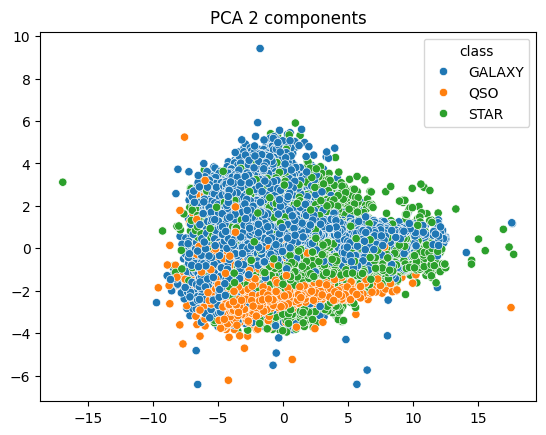

In [6]:
# PCA visualization 2D 
sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=y)
plt.title('PCA 2 components')


Text(0.5, 0.92, 'PCA 3 components')

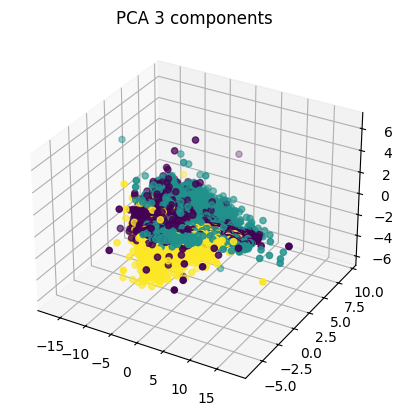

In [7]:
# PCA visualization 3D

colors = {"GALAXY": 0, "STAR": 1, "QSO": 2}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=y.map(colors))
plt.title('PCA 3 components')


<Axes: >

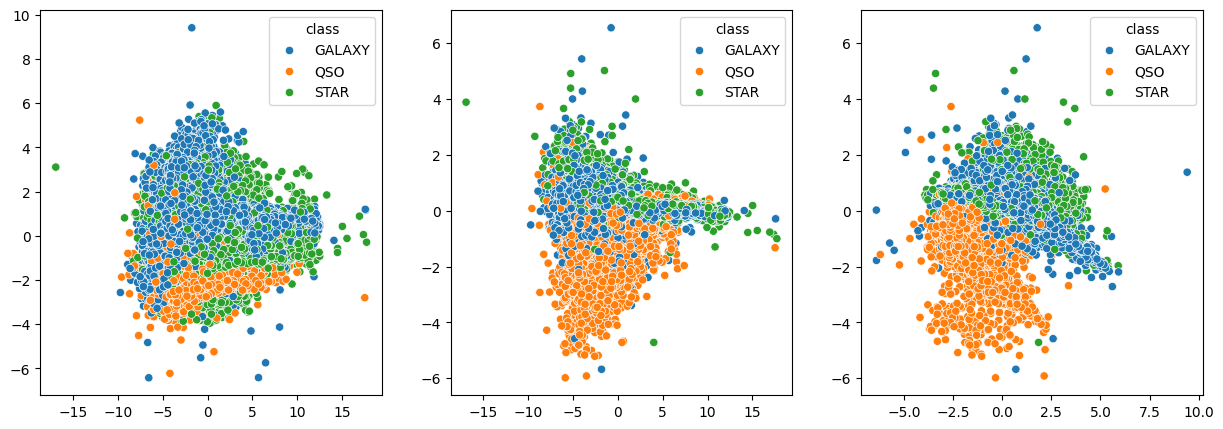

In [9]:
# 3D visualization with 3 2D plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x=X_pca3[:, 0], y=X_pca3[:, 1], hue=y, ax=axes[0])
sns.scatterplot(x=X_pca3[:, 0], y=X_pca3[:, 2], hue=y, ax=axes[1])
sns.scatterplot(x=X_pca3[:, 1], y=X_pca3[:, 2], hue=y, ax=axes[2])

# 2. UMAP

In [11]:
# UMAP visualization 2D
reducer = umap.UMAP(n_components=2, random_state=0)
X_umap2 = reducer.fit_transform(X)

/usr/local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 1.0, 'UMAP 2 components')

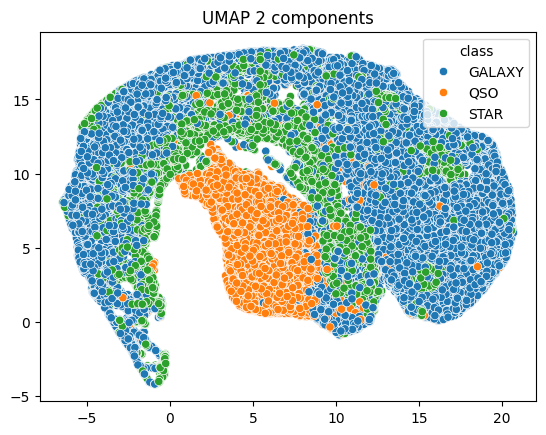

In [12]:
# Plot UMAP 2D
sns.scatterplot(x=X_umap2[:, 0], y=X_umap2[:, 1], hue=y)
plt.title('UMAP 2 components')

In [13]:
# UMAP visualization 3D
reducer = umap.UMAP(n_components=3, random_state=0)
X_umap3 = reducer.fit_transform(X)

/usr/local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 0.92, 'UMAP 3 components')

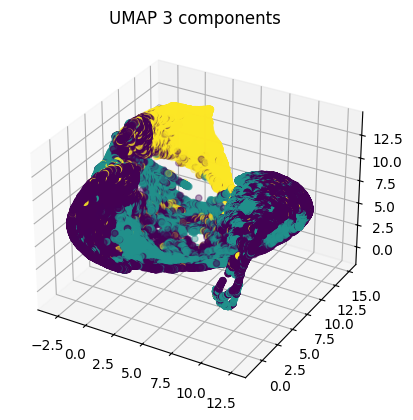

In [14]:
# Plot UMAP 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap3[:, 0], X_umap3[:, 1], X_umap3[:, 2], c=y.map(colors))
plt.title('UMAP 3 components')


<Axes: >

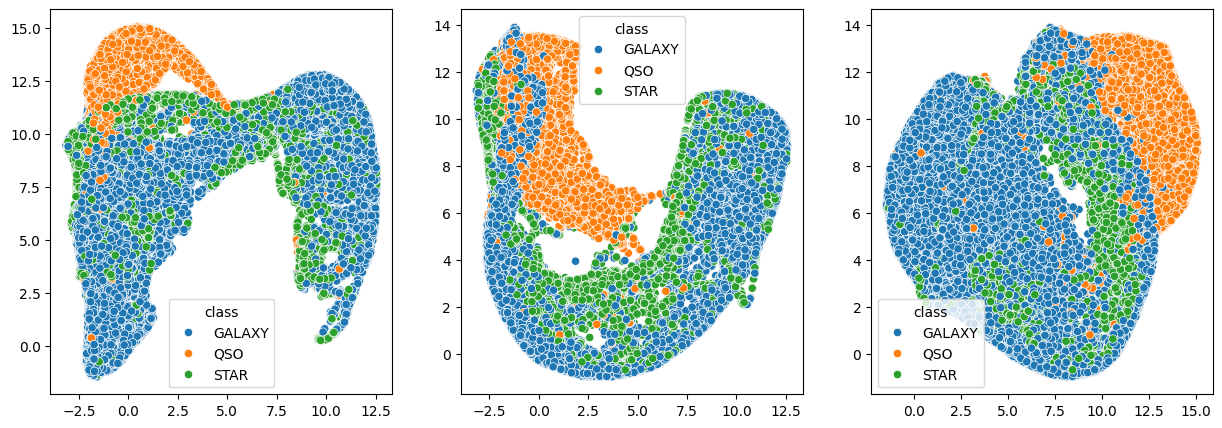

In [15]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(x=X_umap3[:, 0], y=X_umap3[:, 1], hue=y, ax=axes[0])
sns.scatterplot(x=X_umap3[:, 0], y=X_umap3[:, 2], hue=y, ax=axes[1])
sns.scatterplot(x=X_umap3[:, 1], y=X_umap3[:, 2], hue=y, ax=axes[2])


# 3. LDA


In [16]:
# LDA visualization 2D
lda = LDA(n_components=2)
X_lda2 = lda.fit_transform(X, y)

Text(0.5, 1.0, 'LDA 2 components')

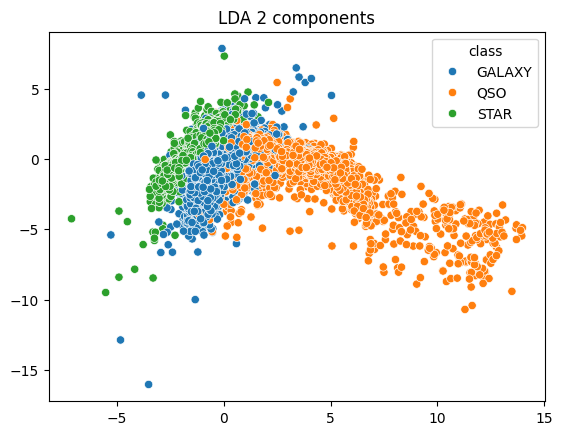

In [17]:
# Plot LDA 2D
sns.scatterplot(x=X_lda2[:, 0], y=X_lda2[:, 1], hue=y)
plt.title('LDA 2 components')

# 4. TSNE


In [18]:
# TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne2 = tsne.fit_transform(X)

Text(0.5, 1.0, 'TSNE 2 components')

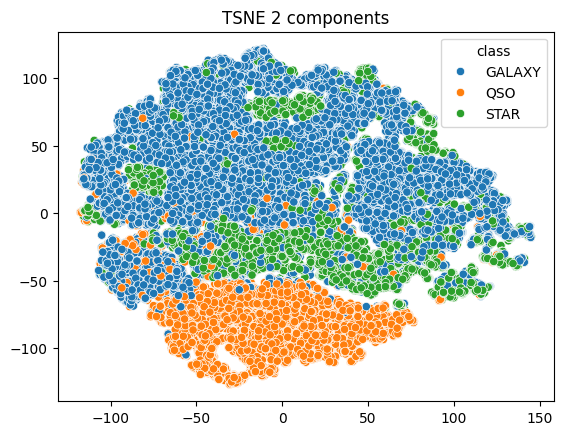

In [19]:
# Plot TSNE 2D
sns.scatterplot(x=X_tsne2[:, 0], y=X_tsne2[:, 1], hue=y)
plt.title('TSNE 2 components')

In [20]:
# TSNE 3D
tsne = TSNE(n_components=3, random_state=0)
X_tsne3 = tsne.fit_transform(X)

Text(0.5, 0.92, 'TSNE 3 components')

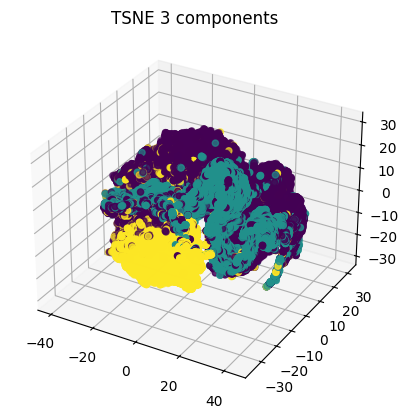

In [21]:
# Plot TSNE 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2], c=y.map(colors))
plt.title('TSNE 3 components')

<Axes: >

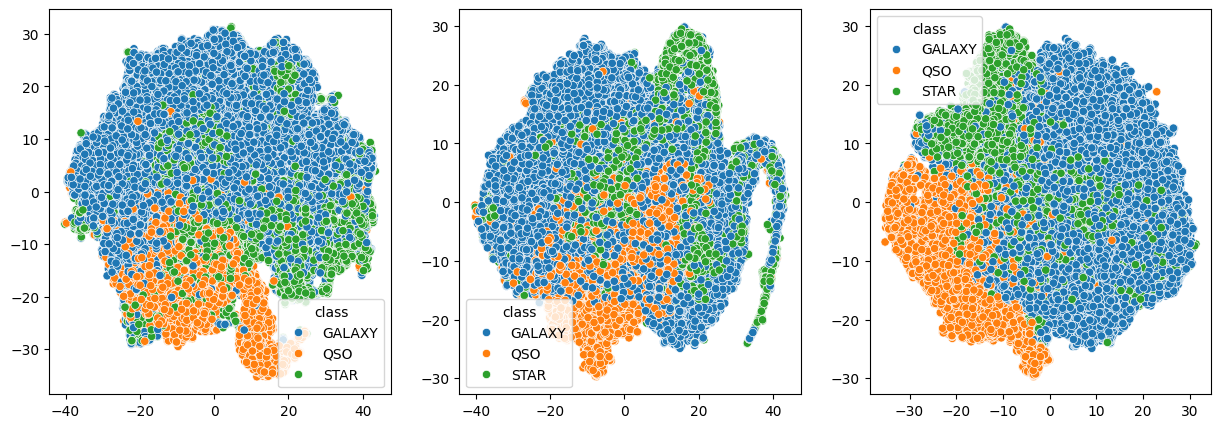

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x=X_tsne3[:, 0], y=X_tsne3[:, 1], hue=y, ax=axes[0])
sns.scatterplot(x=X_tsne3[:, 0], y=X_tsne3[:, 2], hue=y, ax=axes[1])
sns.scatterplot(x=X_tsne3[:, 1], y=X_tsne3[:, 2], hue=y, ax=axes[2])


On all this method with choose umap because it seems like the best one to visualize the data. We will use it in the next notebook to visualize the data.